<a href="https://colab.research.google.com/github/Juanisazalu/TRABAJO-2/blob/main/TRABAJO%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [79]:
tabla=pd.read_csv("CC GENERAL.csv")

CUST_ID: Identificación del titular de la tarjeta de crédito (categórica)
SALDO: Monto del saldo restante en su cuenta para realizar compras (
BALANCE_FREQUENCY: Frecuencia con la que se actualiza el Saldo, puntuación entre 0 y 1 (1 = se actualiza con frecuencia, 0 = no se actualiza con frecuencia)
COMPRAS: Cantidad de compras realizadas desde la cuenta
ONEOFF_PURCHASES: Monto máximo de compra realizada de una sola vez
INSTALLMENTS_PURCHASES: Monto de la compra realizada en cuotas
CASH_ADVANCE: anticipo en efectivo otorgado por el usuario
PURCHASES_FREQUENCY: Con qué frecuencia se realizan las compras, puntúe entre 0 y 1 (1 = compra frecuente, 0 = compra no frecuente)
ONEOFFPURCHASESFREQUENCY: Con qué frecuencia se realizan compras de una sola vez (1 = compradas con frecuencia, 0 = compradas no frecuentes)
COMPRASA PLAZOS FRECUENCIA: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
CASHADVANCEFREQUENCY: Con qué frecuencia se paga el anticipo en efectivo
CASHADVANCETRX: Número de Transacciones realizadas con "Cash in Advanced"
PURCHASES_TRX: Número de transacciones de compra realizadas
CREDIT_LIMIT: Límite de tarjeta de crédito para el usuario
PAGOS: Monto del pago realizado por el usuario
MINIMUM_PAYMENTS: Monto mínimo de pagos realizados por usuario
PRCFULLPAYMENT: Porcentaje del pago total pagado por el usuario
TENENCIA: Tenencia del servicio de tarjeta de crédito para el usuario.

In [12]:
tabla.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [80]:
tabla=tabla.rename(columns={"CUST_ID":"id","BALANCE":"saldo","BALANCE_FREQUENCY":"frecuenciaactsaldo","PURCHASES":"comprastotales","ONEOFF_PURCHASES":"montomaxcomprado","INSTALLMENTS_PURCHASES":"montoacuotas","CASH_ADVANCE":"anticipoefectivo","PURCHASES_FREQUENCY":"frecuenciacompras","ONEOFF_PURCHASES_FREQUENCY":"freccomprasunavez","PURCHASES_INSTALLMENTS_FREQUENCY":"freccomprasplazo","CASH_ADVANCE_FREQUENCY":"frecpagoantefectivo","CASH_ADVANCE_TRX":"ntranscashinadv","PURCHASES_TRX":"ntransacciones","CREDIT_LIMIT":"limtarjetacredito","PAYMENTS":"pagos","MINIMUM_PAYMENTS":"montominpagos","PRC_FULL_PAYMENT":"%totalpagado","TENURE":"tenencia"})                                                                                            
tabla

,id,saldo,frecuenciaactsaldo,comprastotales,montomaxcomprado,montoacuotas,anticipoefectivo,frecuenciacompras,freccomprasunavez,freccomprasplazo,frecpagoantefectivo,ntranscashinadv,ntransacciones,limtarjetacredito,pagos,montominpagos,%totalpagado,tenencia
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
tabla.isnull().sum()

id                       0
saldo                    0
frecuenciaactsaldo       0
comprastotales           0
montomaxcomprado         0
montoacuotas             0
anticipoefectivo         0
frecuenciacompras        0
freccomprasunavez        0
freccomprasplazo         0
frecpagoantefectivo      0
ntranscashinadv          0
ntransacciones           0
limtarjetacredito        1
pagos                    0
montominpagos          313
%totalpagado             0
tenencia                 0
dtype: int64

<Axes: >

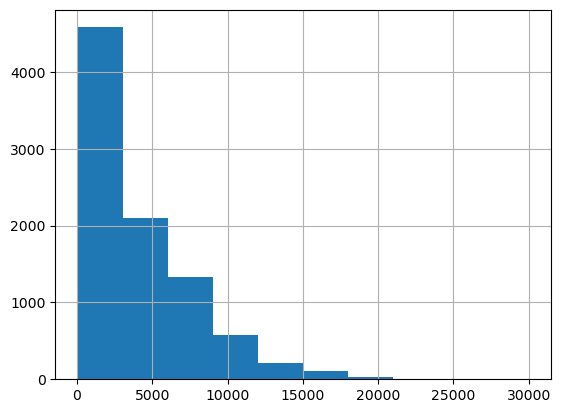

In [17]:
tabla["limtarjetacredito"].hist()

<Axes: >

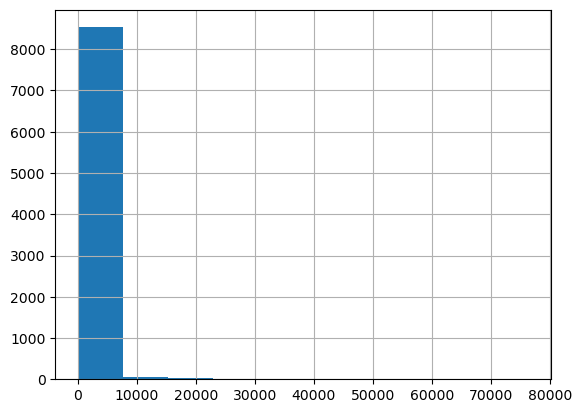

In [22]:
tabla["montominpagos"].hist()

In [81]:
tabla["limtarjetacredito"]=tabla["limtarjetacredito"].fillna(tabla["limtarjetacredito"].mean())
tabla["montominpagos"]=tabla["montominpagos"].fillna(tabla["montominpagos"].mean())

In [47]:
tabla.isnull().sum()

saldo                  0
frecuenciaactsaldo     0
comprastotales         0
montomaxcomprado       0
montoacuotas           0
anticipoefectivo       0
frecuenciacompras      0
freccomprasunavez      0
freccomprasplazo       0
frecpagoantefectivo    0
ntranscashinadv        0
ntransacciones         0
limtarjetacredito      0
pagos                  0
montominpagos          0
%totalpagado           0
tenencia               0
dtype: int64

In [40]:
tabla["id"].shape

(8950,)

In [82]:
tabla1=tabla.copy()
tabla.drop("id",axis=1,inplace=True)

In [83]:
# instancia de la clase standarScaler y escalado de variables
scaler = StandardScaler()
variables_esc= scaler.fit_transform(tabla)

In [84]:
#Modelo kmeans
kmeans = KMeans(init="random",
                n_clusters=3,
                n_init=10,
                max_iter=100,
                random_state=42)
# Ajuste de algoritmo a caracteristicas escaladas
kmeans.fit(variables_esc)
# el valor del SSE mas bajo
print("valor del SSE mas bajo: ", kmeans.inertia_)
# Coordenadas de los centroides
print(kmeans.cluster_centers_)
# Numero de interaciones necesarias para converger
print("Numero de iteraciones: ",kmeans.n_iter_)


valor del SSE mas bajo:  111986.63012447306
[[-0.36306946 -0.17744827 -0.23524842 -0.20656378 -0.17664567 -0.30614862
  -0.07029714 -0.24171898 -0.05241041 -0.32840042 -0.29534856 -0.24710784
  -0.3356835  -0.28420101 -0.13206002  0.00186624 -0.02975215]
 [ 0.30403413  0.43972786  1.51173187  1.26836523  1.2438421  -0.24952597
   1.14202629  1.56476892  0.94331011 -0.36137307 -0.25287174  1.66568851
   0.87763915  0.82383928  0.15038332  0.50383459  0.29860839]
 [ 1.18057376  0.34394401 -0.28751565 -0.20519889 -0.30290651  1.40046172
  -0.63850017 -0.30459492 -0.54957726  1.57726808  1.36078227 -0.36424716
   0.61398873  0.45514209  0.39755515 -0.41064476 -0.12235168]]
Numero de iteraciones:  13


In [56]:
#Predecir valores de etiquetas
label = kmeans.fit_predict(variables_esc)
print(label[0:100])


[0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1 0 2 2 0 0 0 2 0 2 0 2 0 1 0 2
 1 2 2 0 0 0 0 1 0 0 2 1 0 2 0 0 0 0 0 2 1 0 2 0 0 2 0 1 0 0 0 0 0 2 2 0 0
 0 0 1 0 0 2 0 0 0 0 1 1 2 2 0 2 1 2 0 0 0 0 0 2 0 0]


## Metodo del codo

In [57]:
# Argumentos del algoritmo kmeans
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
# Lista que almacena los valores de SSE para cada valor K, metricas de evaluacion
sse = []
# Ciclo para entrenar algoritmos de kmeans con cada valor de k
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(variables_esc)
  sse.append(kmeans.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


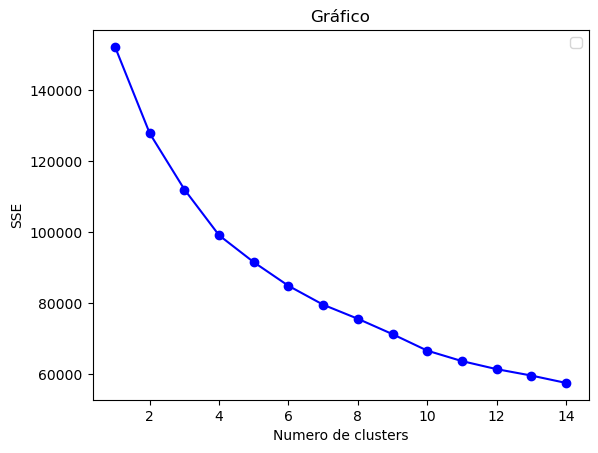

In [60]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,15), sse, color='blue', marker='o')

# Personalizar el gráfico
ax.set_title('Gráfico')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')
ax.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 15),
                 sse, curve="convex",
                 direction="decreasing")

kl.elbow

## Coeficiente de siluete

In [64]:
# Lista contiene los coeficientes de silueta para cada k
silhouette_coefficients = []
# Fíjate que empiezas con 2 grupos para el coeficiente de silueta
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(variables_esc)
  score = silhouette_score(variables_esc, kmeans.labels_)
  silhouette_coefficients.append(score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


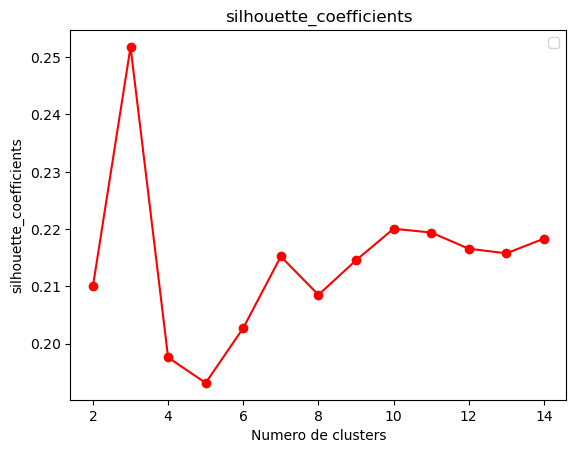

In [66]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,15), silhouette_coefficients, color='red', marker='o')

# Personalizar el gráfico
ax.set_title('silhouette_coefficients')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('silhouette_coefficients')
ax.legend()

# Mostrar el gráfico
plt.show()

# Diagrama de clusters

In [89]:
# Función de vinculación para agrupar datos según similud
Z = linkage(tabla, method='ward', metric='euclidean')
Z[:100]

array([[5.21900000e+03, 8.44200000e+03, 4.84679340e+00, 2.00000000e+00],
       [1.13100000e+03, 5.92800000e+03, 5.17391107e+00, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.98212337e+00, 2.00000000e+00],
       [4.18500000e+03, 7.36600000e+03, 1.13095917e+01, 2.00000000e+00],
       [4.62900000e+03, 7.91900000e+03, 1.18228254e+01, 2.00000000e+00],
       [8.60300000e+03, 8.64000000e+03, 1.25061920e+01, 2.00000000e+00],
       [1.23500000e+03, 6.98500000e+03, 1.32381056e+01, 2.00000000e+00],
       [6.79600000e+03, 7.39100000e+03, 1.33883214e+01, 2.00000000e+00],
       [8.73300000e+03, 8.88800000e+03, 1.35405921e+01, 2.00000000e+00],
       [8.62100000e+03, 8.64100000e+03, 1.36841595e+01, 2.00000000e+00],
       [2.32000000e+03, 2.86100000e+03, 1.39968875e+01, 2.00000000e+00],
       [3.94300000e+03, 6.09500000e+03, 1.41794774e+01, 2.00000000e+00],
       [8.69500000e+03, 8.87700000e+03, 1.43030671e+01, 2.00000000e+00],
       [2.47000000e+02, 8.06800000e+03, 1.47571366e

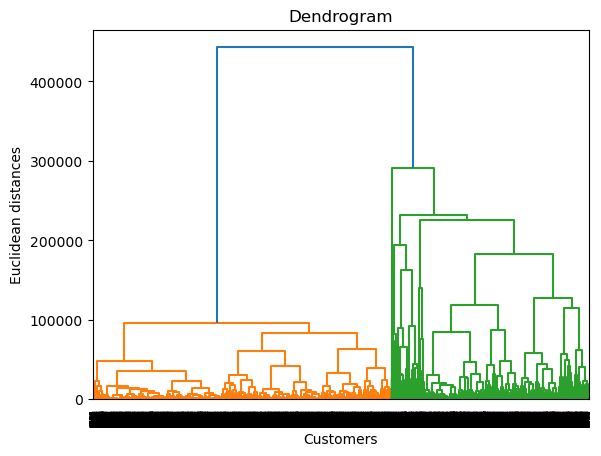

In [71]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(tabla, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [91]:
# Dibujo del dendograma
labelList = list(tabla1['id'])
print(labelList)
plt.figure(figsize=(100, 100))
dendrogram(Z,orientation='right',labels=labelList, distance_sort='descending',show_leaf_counts=False,leaf_font_size=16)
plt.show()

['C10001', 'C10002', 'C10003', 'C10004', 'C10005', 'C10006', 'C10007', 'C10008', 'C10009', 'C10010', 'C10011', 'C10012', 'C10013', 'C10014', 'C10015', 'C10016', 'C10017', 'C10018', 'C10019', 'C10020', 'C10021', 'C10022', 'C10023', 'C10024', 'C10025', 'C10026', 'C10027', 'C10028', 'C10029', 'C10030', 'C10031', 'C10032', 'C10033', 'C10034', 'C10035', 'C10036', 'C10037', 'C10038', 'C10039', 'C10040', 'C10041', 'C10043', 'C10044', 'C10045', 'C10046', 'C10047', 'C10048', 'C10049', 'C10050', 'C10051', 'C10052', 'C10053', 'C10054', 'C10055', 'C10056', 'C10057', 'C10058', 'C10059', 'C10060', 'C10061', 'C10062', 'C10063', 'C10064', 'C10065', 'C10067', 'C10068', 'C10069', 'C10070', 'C10071', 'C10072', 'C10073', 'C10074', 'C10075', 'C10077', 'C10078', 'C10079', 'C10080', 'C10081', 'C10082', 'C10083', 'C10084', 'C10085', 'C10086', 'C10087', 'C10088', 'C10089', 'C10090', 'C10092', 'C10093', 'C10094', 'C10095', 'C10096', 'C10097', 'C10098', 'C10099', 'C10100', 'C10101', 'C10102', 'C10103', 'C10104',

TypeError: 'dict' object is not callable

<Figure size 10000x10000 with 0 Axes>

In [ ]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()